Load moduls

In [33]:
from math import sin, cos, sqrt, atan2, radians
import numpy as np
import scipy.stats as stats
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline
%config InlineBackend.figure_format ='retina'

# House

In [42]:
df = pd.read_csv('data/houses.csv')

In [43]:
df.head(2)

,solddate,price,address1,postcode,latitude,longitude,bedrooms,bathrooms,carparkings,agentbrand,location,suburb
0,25-Aug-17,380000,505/7 Katherine Place,3000.0,-37.820240,144.956451,2.0,1,0,City Residential Real Estate,"('-37.82024', '144.956451')",MELBOURNE
1,28-Aug-17,347000,1509/8 Franklin Street,3000.0,-37.807472,144.962021,2.0,1,0,Caine Real Estate,"('-37.8074722', '144.962021')",MELBOURNE


In [57]:
df = df[~df.location.isnull()]
def calcdist(value):
    
    slt = value.split('\'')

    lat1 = radians(-37.810817)
    lon1 = radians(144.963135)
    lat2 = radians(float(slt[1]))
    lon2 = radians(float(slt[3]))

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    
    R = 6373.0
    distance = R * c

    return distance

df['dist2cbd'] = df.location.map(calcdist)

In [59]:
df.head(2)

,solddate,price,address1,postcode,latitude,longitude,bedrooms,bathrooms,carparkings,agentbrand,location,suburb,dist2cbd
0,25-Aug-17,380000,505/7 Katherine Place,3000.0,-37.820240,144.956451,2.0,1,0,City Residential Real Estate,"('-37.82024', '144.956451')",MELBOURNE,1.201459
1,28-Aug-17,347000,1509/8 Franklin Street,3000.0,-37.807472,144.962021,2.0,1,0,Caine Real Estate,"('-37.8074722', '144.962021')",MELBOURNE,0.384706


In [81]:
choose_sub = ['yarraville', 'newport', 'spotswood', 'kensington',
              'ascot vale', 'moonee ponds', 'coburg', 'clifton hill',
              'northcote', 'malvern east', 'glen iris', 'elsternwick',
              'ormond']

In [82]:
df.suburb = df.suburb.str.lower()

In [83]:
df.shape

(203198, 13)

In [85]:
def ch(x):
    if x in choose_sub:
        return True
    else:
        return False
    
ch = df[df.suburb.map(ch)]

In [87]:
ch.suburb.unique()

array(['yarraville', 'newport', 'spotswood', 'kensington', 'ascot vale',
       'moonee ponds', 'coburg', 'clifton hill', 'northcote',
       'malvern east', 'glen iris', 'elsternwick', 'ormond'], dtype=object)

In [88]:
ch.shape

(8790, 13)

In [89]:
ch.head()

,solddate,price,address1,postcode,latitude,longitude,bedrooms,bathrooms,carparkings,agentbrand,location,suburb,dist2cbd
6990,02-Sep-17,935000,37 Ovens Street,3013.0,-37.818370,144.891479,2.0,1,0,Biggin & Scott Yarraville,"('-37.81837', '144.891479')",yarraville,6.352316
6991,01-Aug-17,960000,61 Tongue Street,3013.0,-37.813140,144.890900,2.0,1,0,Jas Stephens Real Estate,"('-37.81314', '144.8909')",yarraville,6.352875
6992,03-Jun-17,950000,89 Ballarat Street,3013.0,-37.819560,144.890533,2.0,1,0,Jas Stephens Real Estate,"('-37.81956', '144.890533')",yarraville,6.453286
6993,24-May-17,840000,96 Hamilton Street,3013.0,-37.811966,144.886459,2.0,1,0,Village Real Estate Seddon,"('-37.8119659', '144.886459')",yarraville,6.739135
6994,05-May-17,815000,40 Goulburn Street,3013.0,-37.814858,144.888900,2.0,1,0,Compton Green Williamstown,"('-37.8148575', '144.8889')",yarraville,6.538755


In [90]:
c = ch.drop(['postcode', 'latitude', 'longitude', 'location'], axis=1)

In [94]:
c.head(2)

,solddate,price,address1,bedrooms,bathrooms,carparkings,agentbrand,suburb,dist2cbd
6990,02-Sep-17,935000,37 Ovens Street,2.0,1,0,Biggin & Scott Yarraville,yarraville,6.352316
6991,01-Aug-17,960000,61 Tongue Street,2.0,1,0,Jas Stephens Real Estate,yarraville,6.352875


In [106]:
# pd.to_datetime(c.solddate)
def qw(x):
    try:
        s = x.split('-')
        month = s[1]
        return True
    except:
        return False
c = c[c.solddate.map(qw)]

In [108]:
c.solddate = pd.to_datetime(c.solddate)

/Users/alex/anaconda2/lib/python2.7/site-packages/pandas/core/generic.py:2999: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [116]:
c.solddate = c.solddate.map(lambda x: x.strftime('%Y-%m'))

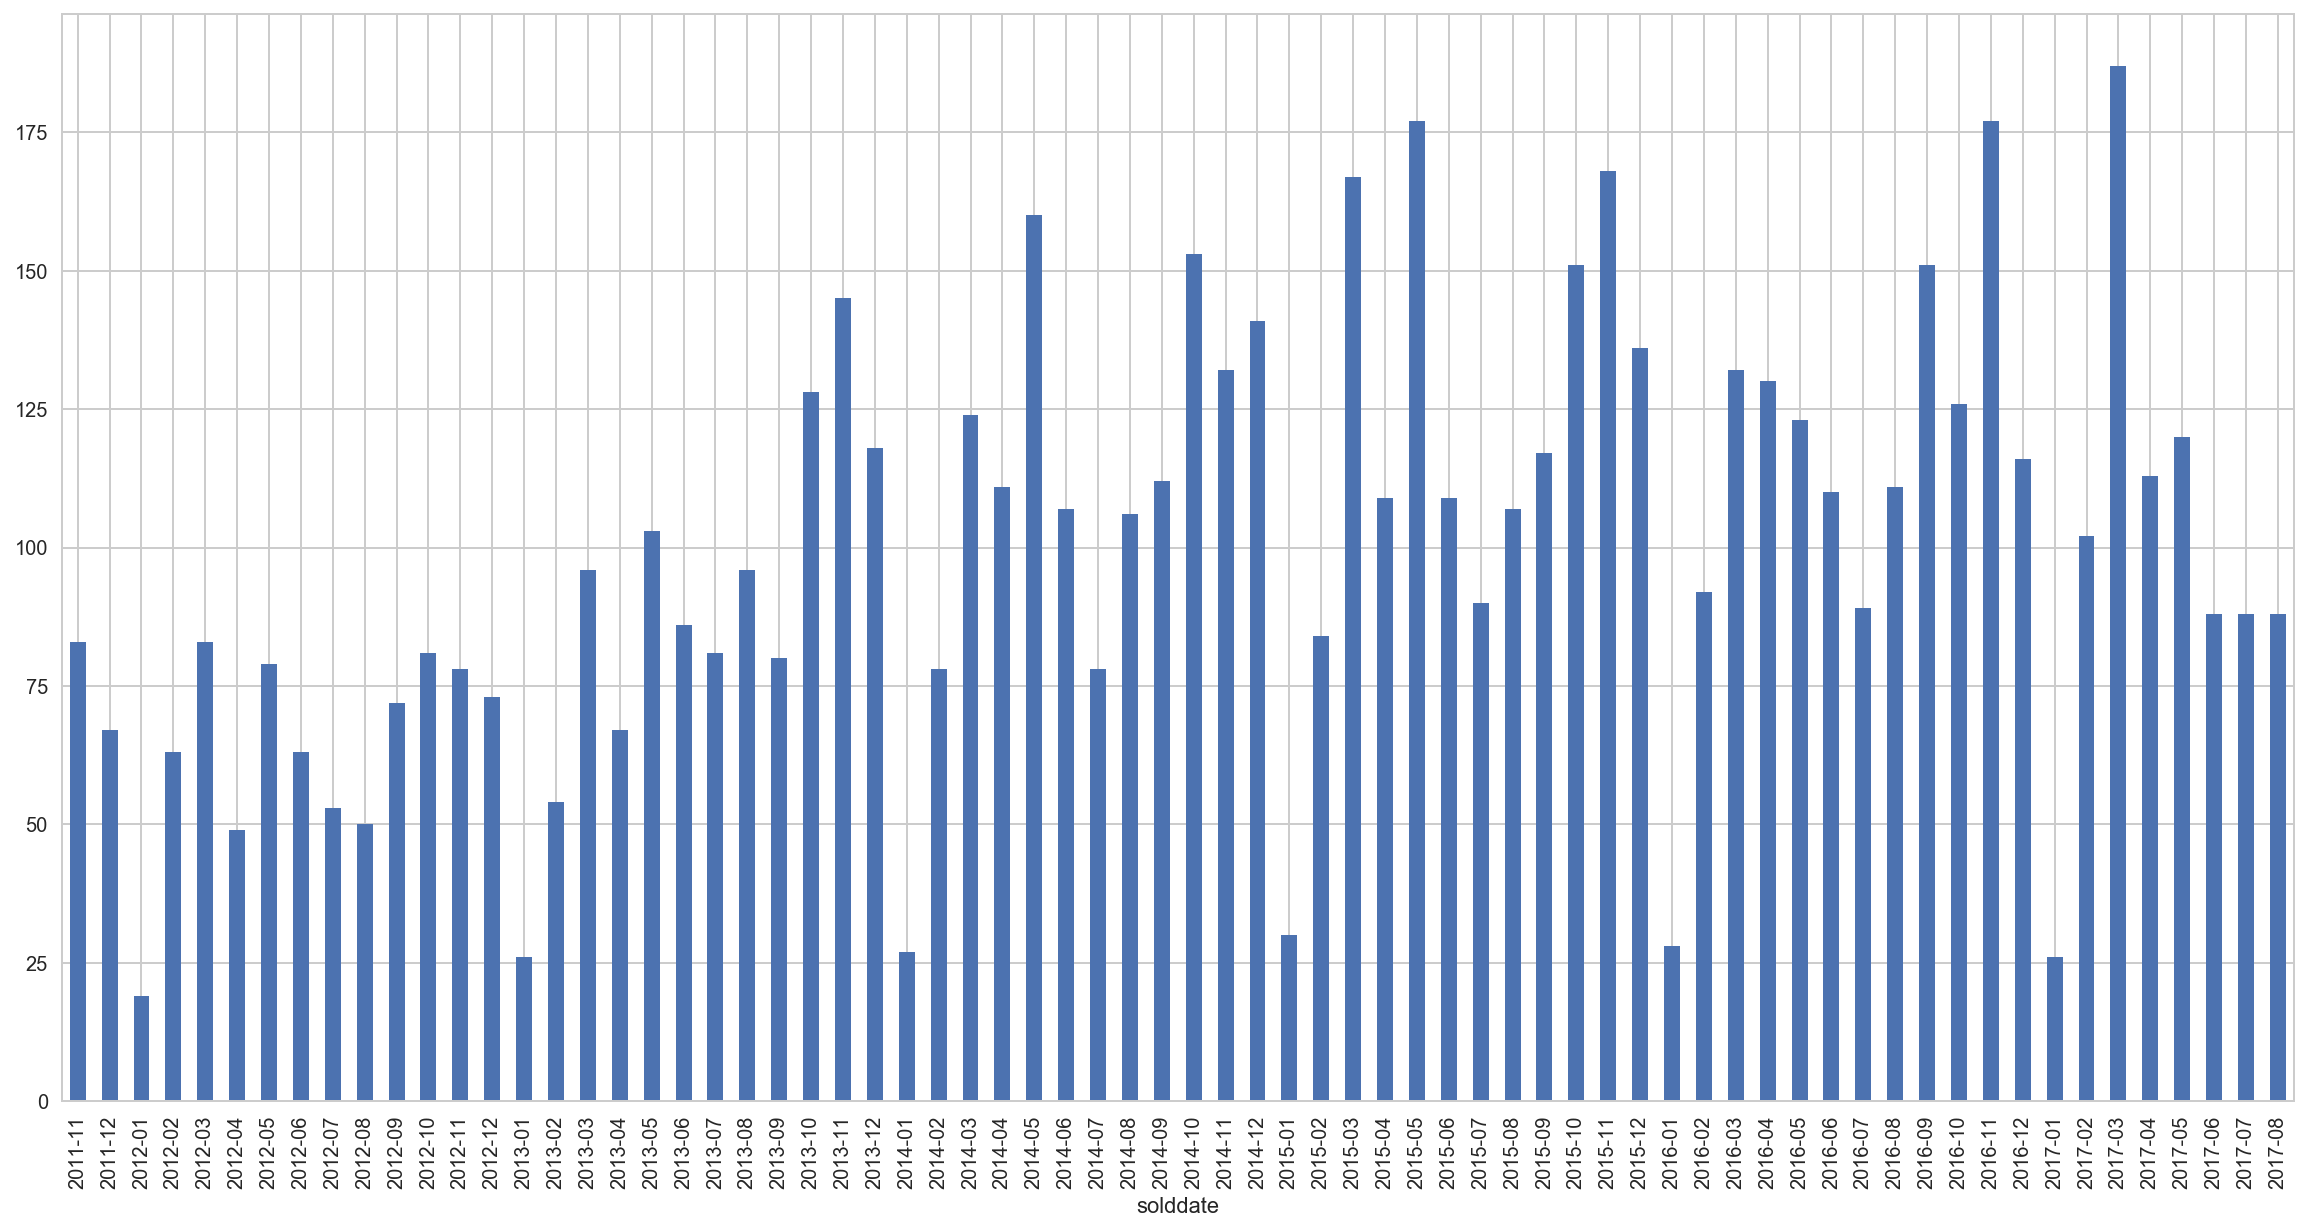

In [132]:
c.groupby(by='solddate').count()['price'][56:-1].plot(kind='bar', figsize=(20,10))

In [148]:
# outliers 
c = c[~(c.price > 4000000)]

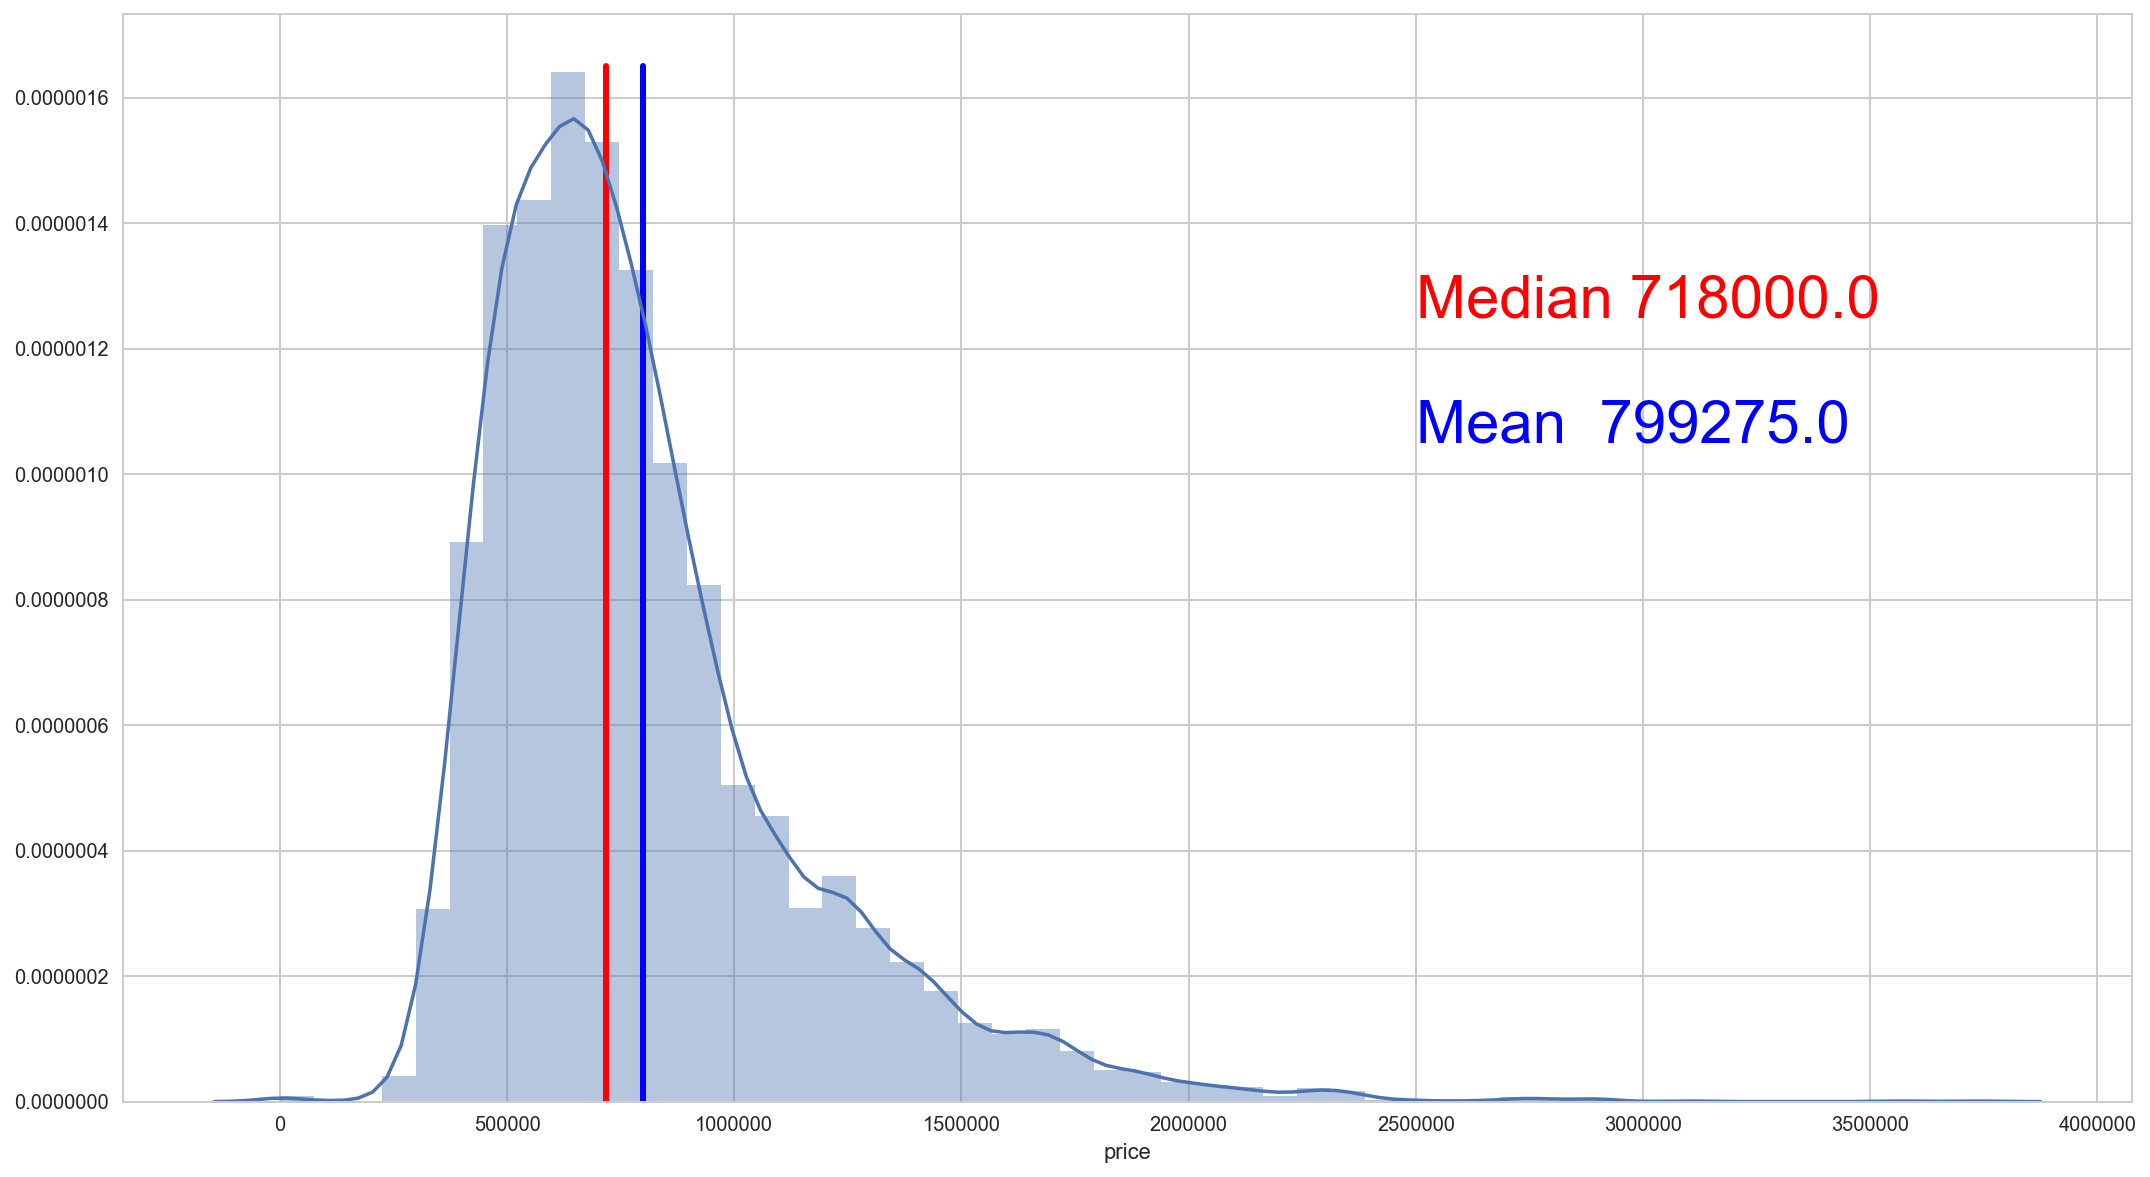

In [177]:
me = c.price.median()
ma = c.price.mean()
plt.figure(figsize=(18,10))

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
plt.text(2500000, 0.00000125, s='Median '+str(me), fontsize=30, fontdict={'color':'red'})
plt.text(2500000, 0.00000105, s='Mean  '+str(round(ma)), fontsize=30, fontdict={'color':'blue'})

plt.plot([me, me], [0, 0.00000165], 'r-', lw=3)
plt.plot([ma, ma], [0, 0.00000165], 'b-', lw=3)
sns.distplot(c.price)

In [203]:
c.groupby(by='agentbrand').count().sort_values(by='price', ascending=False)

,solddate,price,address1,bedrooms,bathrooms,carparkings,suburb,dist2cbd
agentbrand,,,,,,,,
Nelson Alexander Northcote,440,440,440,440,440,440,440,440
Jas Stephens Real Estate,413,413,413,413,413,413,413,413
Rendina Real Estate,392,392,392,392,392,392,392,392
Barry Plant Coburg,347,347,347,347,347,347,347,347
Biggin & Scott Elsternwick,252,252,252,252,252,252,252,252
Barry Plant Northcote,208,208,208,208,208,208,208,208
Jellis Craig Kensington,196,196,196,196,196,196,196,196
Sweeney Estate Agents Williamstown,179,179,179,179,179,179,179,179
Noel Jones Glen Iris,161,161,161,161,161,161,161,161


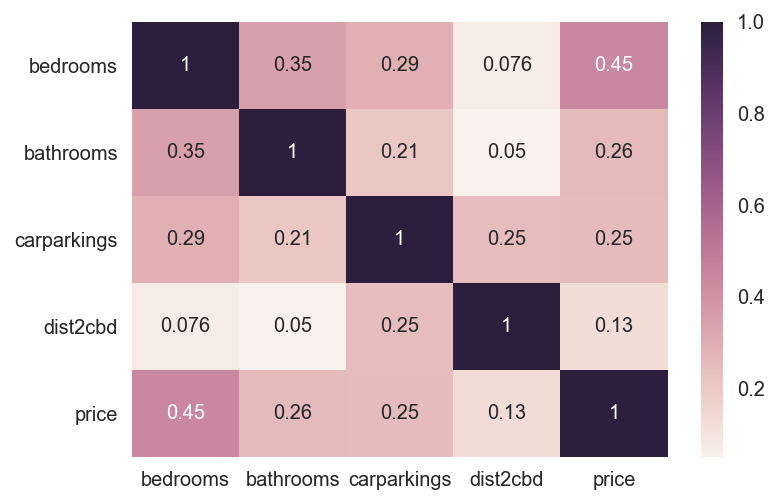

In [213]:
c.bathrooms = c.bathrooms.astype(int)
c.carparkings = c.carparkings.astype(int)
corr = c[['bedrooms', 'bathrooms', 'carparkings', 'dist2cbd', 'price']].corr()
sns.heatmap(corr, annot=True)